In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


bike_df = pd.read_csv('./train.csv')
print(bike_df.shape)
bike_df.head(3)


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [2]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
# 문자열로 되어 있는 dataetime 피쳐 값을 datetime 타입으로 변환
# bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
# year feature 새로 생성
bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB


In [5]:
bike_df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

In [6]:
# month feature 새로 생성
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
# day feature 새로 생성
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
# hour feature 새로 생성
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
# minute feature 새로 생성
bike_df['minute']=bike_df.datetime.apply(lambda x:x.minute)

In [7]:
bike_df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0


In [8]:
# count = casual + registered 이므로 필요한 데이터가 아니다
drop_columns=['datetime','casual','registered','minute']
bike_df.drop(
    drop_columns
    ,axis=1
    ,inplace=True
)

bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

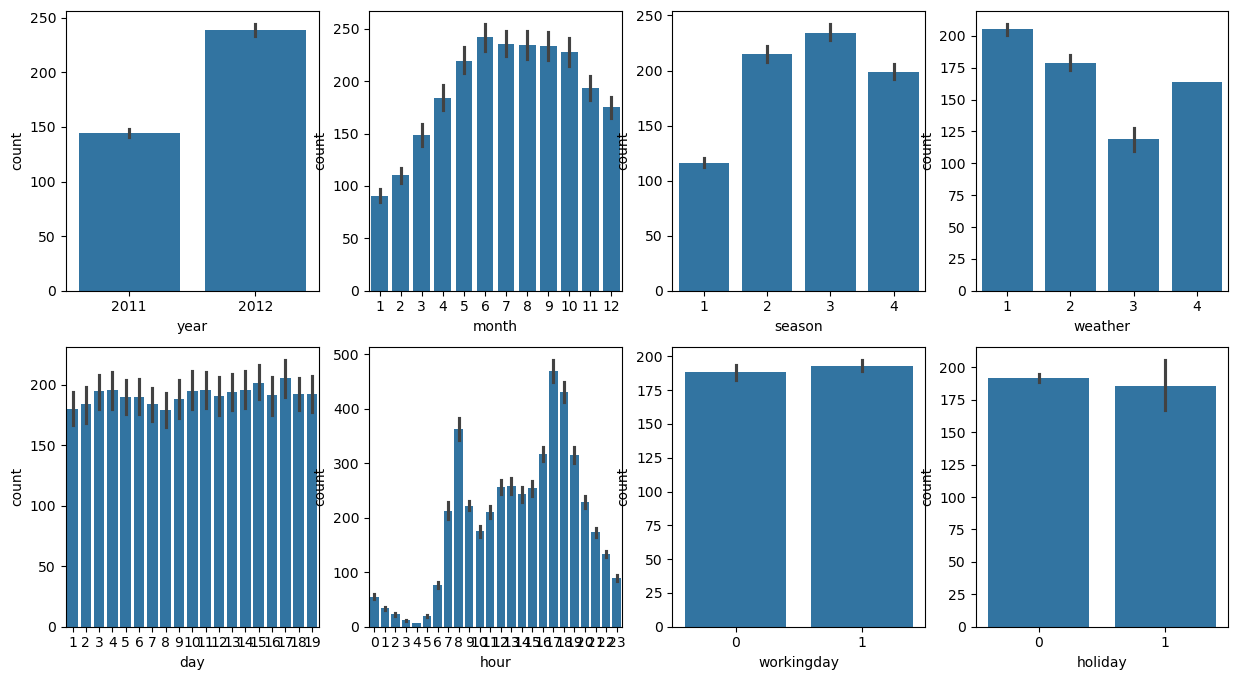

In [9]:
# 피쳐의 분포 확인
cat_features=[
    'year'
    ,'month'
    ,'season'
    ,'weather'
    ,'day'
    ,'hour'
    ,'workingday'
    ,'holiday'
]

# 막대 그래프로 분포 확인
fig,axs=plt.subplots(
    figsize=(15,8)
    ,ncols=4
    ,nrows=2
)

for i, feature in enumerate(cat_features):
    row=int(i/4)
    col=i%4
    sns.barplot(
        data=bike_df
        ,x=feature
        ,y='count'
        ,ax=axs[row][col]
    )
    
plt.show()

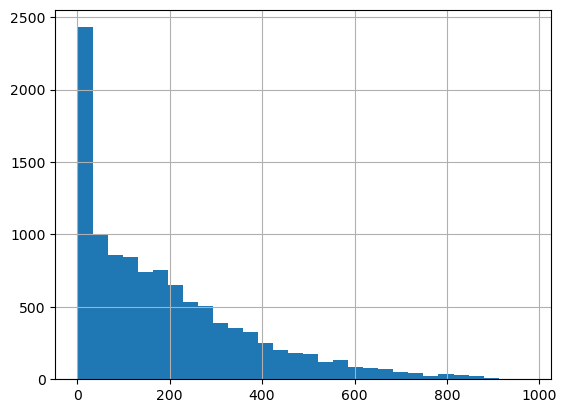

In [10]:
# label 또는 중요 feature가 정규 분포를 따르는지 확인을 해야한다
# 정규 분포를 따르지 않으면 모델의 성능이 저하 될 수 있다
# 따라서 데이터 전처리 과정에서 데이터 분포를 확인하고 정규 분포로 변환 작업이 필요하다
# ex) log 변환, 제곱근 변환 등 정규 분포 형태로 변환이 필요 할 수 있다
# 트리 기반 모델은 정규 분포를 따르지 않아도 성능 저하가 없을 수 있다
bike_df['count'].hist(bins=30)
plt.show()

In [11]:
# 평가 지표 계산하는 함수 선언
def rmsle_(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse_(y,pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(np.mean(mean_squared_error(y, pred)))

def evaluate_regr(y,pred):
    from sklearn.metrics import mean_absolute_error
    rmsle=rmsle_(y,pred)
    rmse=rmse_(y,pred)
    mae_val=mean_absolute_error(y,pred)
    print(f'RMSLE : {rmsle}, RMSE : {rmse}, MAE : {mae_val}')

In [12]:
# 전처리 없이 모델 생성하고 학습하고 평가
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# 데이터와 레이블 분리
y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1,inplace=False)

# 학습/테스트 분리
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_target
    ,test_size=0.3
    ,random_state=0
)

# 모델 생성 : LinearRegression() : 단순 선형 회귀 모델(규제가 없다)
lr_reg=LinearRegression()

#학습
lr_reg.fit(X_train,y_train)

# 예측값 추출
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE : 1.1646636237113652, RMSE : 140.8995886716545, MAE : 105.92444835099776


In [13]:
# 오차 상위 n개 확인 함수 : 정렬 필요
def get_top_error_data(y_test,pred,n_tops=5):
    result_df=pd.DataFrame(
        y_test.values
        ,columns=['real_count']
    )
    result_df['predict_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predict_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test,pred)

      real_count  predict_count   diff
1618         890          322.0  568.0
3151         798          241.0  557.0
966          884          327.0  557.0
412          745          194.0  551.0
2817         856          310.0  546.0


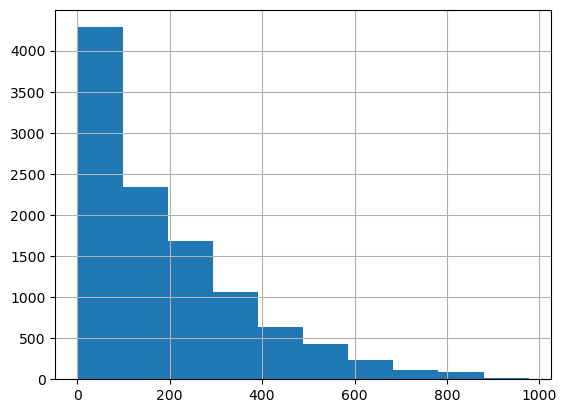

In [14]:
y_target.hist()
plt.show()

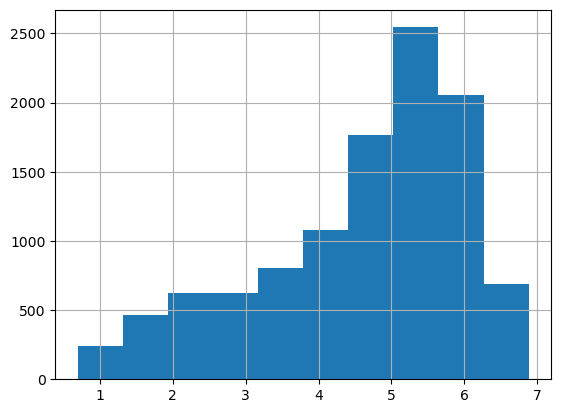

In [15]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()
plt.show()

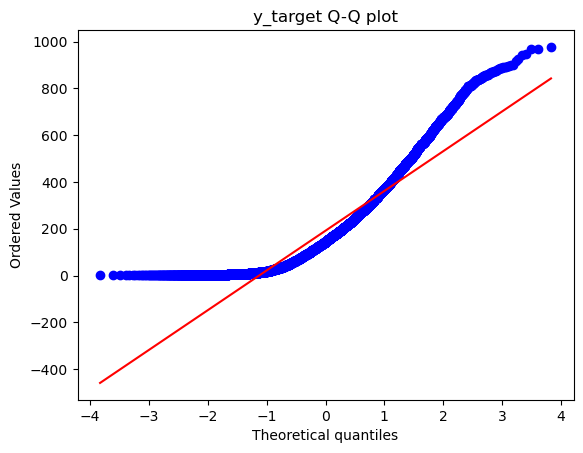

In [16]:
# 시각화 QQ plot, 정량화된 값을 확인 : shaprio value
from scipy import stats
stats.probplot(y_target,dist='norm',plot=plt) 
plt.title('y_target Q-Q plot')
plt.show()

In [17]:
from scipy.stats import shapiro
stat,p=shapiro(y_target)

if p>0.05:
    print('정규분포를 따른다')
else:
    print(f'P-value : {p}, 정규 분포를 안따른다, 로그 반환 필요!!!')

P-value : 5.369837893115507e-68, 정규 분포를 안따른다, 로그 반환 필요!!!


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


In [18]:
# target log
y_target_log=np.log1p(y_target)

X_tr,X_tst,y_tr,y_tst=train_test_split(
    X_features
    ,y_target_log
    ,test_size=0.3
    ,random_state=0
)

lr_reg=LinearRegression()
lr_reg.fit(X_tr,y_tr)
pred=lr_reg.predict(X_tst)

# 예측 대여 대수 로그 값을 가지고 잇다 => 지수함수 사용
y_tst_exp=np.expm1(y_tst) # y_tst log변환 된걸 원래 대수로 변경
pred_exp=np.expm1(pred)

evaluate_regr(y_tst_exp,pred_exp)

RMSLE : 1.0168265982003482, RMSE : 162.59426809004782, MAE : 109.28615860077618


계수 값
season       -0.044525
holiday      -0.046010
workingday   -0.066383
weather      -0.014733
temp          0.011712
atemp         0.030857
humidity     -0.014512
windspeed     0.003961
year          0.418513
month         0.076839
day           0.003353
hour          0.098348
dtype: float64


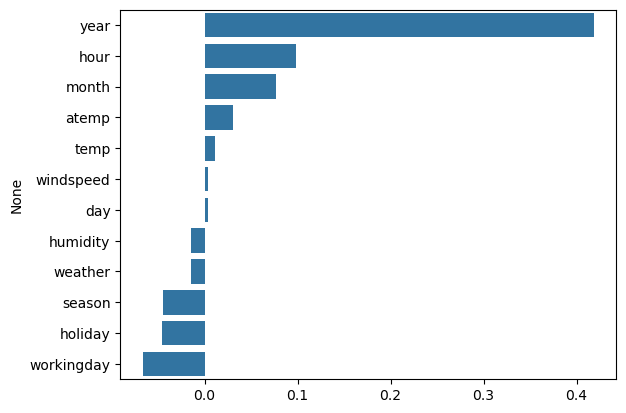

In [19]:
# 계수 값들을 확인 : 어떤 피쳐가 중요한 역할 파악
coef_=pd.Series(
    lr_reg.coef_
    ,index=X_features.columns
)
print(f'계수 값\n{coef_}')

coef_sort=coef_.sort_values(ascending=False)

sns.barplot(x=coef_sort.values,y=coef_sort.index)
plt.show()

In [27]:
columns=[
    'year'
    ,'month'
    ,'day'
    ,'hour'
    ,'holiday'
    ,'workingday'
    ,'season'
    ,'weather'
]
X_features_ohe=pd.get_dummies(
    X_features
    ,columns=columns
)

# 원-핫 인코딩이 적용된 피쳐 데이터 세트 기반으로 학습/예측 데이터 분할
X_train_ohe,X_test_ohe,y_train_ohe,y_test_ohe=train_test_split(
    X_features_ohe
    ,y_target_log
    # ,y_target
    ,test_size=0.3
    ,random_state=0
)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predcit(model,X_train,X_test,y_train,y_test,is_expm1=False):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    if is_expm1 :
        y_test=np.expm1(y_test)
        pred=np.expm1(pred)
    print('**',model.__class__.__name__,'**')
    evaluate_regr(y_test,pred)


In [31]:
# 모델별로 평가 수행
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predcit(model,X_train_ohe,X_test_ohe,y_train_ohe,y_test_ohe,is_expm1=True)

** LinearRegression **
RMSLE : 0.589633733262122, RMSE : 97.68764291861173, MAE : 63.38202932257897
** Ridge **
RMSLE : 0.5901367703437248, RMSE : 98.52859077604568, MAE : 63.893352771107956
** Lasso **
RMSLE : 0.6347518077052988, RMSE : 113.21881019147774, MAE : 72.80270669734962


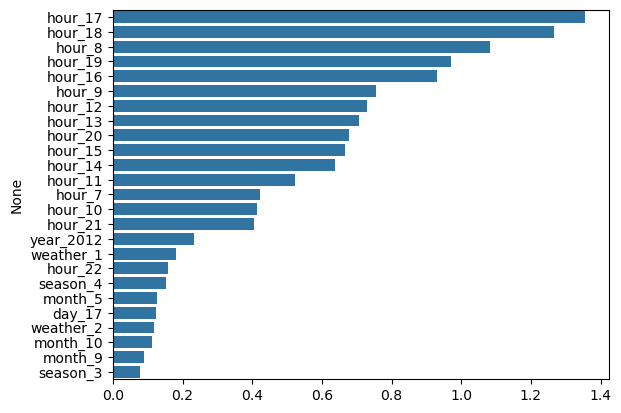

In [32]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values,y=coef_sort.index)
plt.show()

In [34]:
ridge_results = []
lasso_results = []

for alpha in range(0, 101):
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    print('='*50)
    print(f'alpha : {alpha}')
    ridge_score = get_model_predcit(ridge, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe, is_expm1=True)
    ridge_results.append((alpha, ridge_score))
    lasso_score = get_model_predcit(lasso, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe, is_expm1=True)
    lasso_results.append((alpha, lasso_score))

alpha : 0
** Ridge **
RMSLE : 0.5897205420392388, RMSE : 97.74615407060202, MAE : 63.41463728222294


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+03, tolerance: 1.533e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

** Lasso **
RMSLE : 0.5896337332621217, RMSE : 97.68764291861575, MAE : 63.3820293225802
alpha : 1
** Ridge **
RMSLE : 0.5895391663007115, RMSE : 97.74495351657619, MAE : 63.41631036217564
** Lasso **
RMSLE : 1.2398677584264723, RMSE : 177.7215780384234, MAE : 121.34240923835165
alpha : 2
** Ridge **
RMSLE : 0.5894798906293434, RMSE : 97.80931309845754, MAE : 63.45839692012418
** Lasso **
RMSLE : 1.2616771316398145, RMSE : 183.29369908873377, MAE : 125.39300706992786
alpha : 3
** Ridge **
RMSLE : 0.5894544295122993, RMSE : 97.88014952954447, MAE : 63.502812047270176
** Lasso **
RMSLE : 1.295883458776995, RMSE : 189.71202561460166, MAE : 130.68393395234173
alpha : 4
** Ridge **
RMSLE : 0.5894616580631327, RMSE : 97.95706875065177, MAE : 63.55262000586692
** Lasso **
RMSLE : 1.3415387911647612, RMSE : 196.13666619984485, MAE : 136.61692178183748
alpha : 5
** Ridge **
RMSLE : 0.5895005473768302, RMSE : 98.03972670487778, MAE : 63.6049208745368
** Lasso **
RMSLE : 1.3653161556875035, RMSE 

In [ ]:
# 회귀 트리 성능 확인
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
s
# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg=RandomForestRegressor(n_estimators=500)
gbm_reg=GradientBoostingRegressor(n_estimators=500)
xgb_reg=XGBRegressor(n_estimators=500,tree_method='gpu_hist', predictor='gpu_predictor')
lgbm_reg=LGBMRegressor(n_estimators=500,device='gpu')

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predcit(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=False)
print('='*100)
for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predcit(model,X_train_ohe.values,X_test_ohe.values,y_train_ohe.values,y_test_ohe.values,is_expm1=True)

** RandomForestRegressor **
RMSLE : 0.35280063258119115, RMSE : 45.27883220529298, MAE : 28.486674219228416
** GradientBoostingRegressor **
RMSLE : nan, RMSE : 53.116214766567246, MAE : 36.08987169814374
** XGBRegressor **
RMSLE : nan, RMSE : 45.41278772617356, MAE : 28.703264236450195


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


** LGBMRegressor **
RMSLE : nan, RMSE : 41.84444799654268, MAE : 26.848681328263595
** RandomForestRegressor **
RMSLE : 0.35348294400208563, RMSE : 50.2874985771233, MAE : 31.12262523263182
** GradientBoostingRegressor **
RMSLE : 0.3298827625874356, RMSE : 53.33422667230923, MAE : 32.74347116722745
** XGBRegressor **
RMSLE : 0.338794404977595, RMSE : 51.47528839773345, MAE : 31.356518783564955
** LGBMRegressor **
RMSLE : 0.31889627658728664, RMSE : 47.222215813245, MAE : 29.031571652702333


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
